In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
# %config InlineBackend.figure_format = 'svg' 
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [25, 10]

In [2]:
df = pd.read_csv('/kaggle/input/owid-covid-data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
df.loc[df["new_cases"] == 0, "new_cases"] = 1

In [4]:
df[df['location']=='Russia'].date

214813    2020-01-03
214814    2020-01-04
214815    2020-01-05
214816    2020-01-06
214817    2020-01-07
             ...    
215971    2023-03-06
215972    2023-03-07
215973    2023-03-08
215974    2023-03-09
215975    2023-03-10
Name: date, Length: 1163, dtype: object

In [5]:
df_rus = df[df['location']=='Russia']
df_rus['date'] = pd.to_datetime(df_rus['date'])
df_rus = df_rus[df_rus['date'] >= '2020-03-03']

In [6]:
df_rus['current_date'] = (df_rus['date'] - df_rus['date'].min()).dt.days + 1

In [7]:
df_rus[['date', 'current_date', 'total_cases', 'new_cases']]

,date,current_date,total_cases,new_cases
214873,2020-03-03,1,3.0,1.0
214874,2020-03-04,2,3.0,1.0
214875,2020-03-05,3,3.0,1.0
214876,2020-03-06,4,4.0,1.0
214877,2020-03-07,5,4.0,1.0
...,...,...,...,...
215971,2023-03-06,1099,22353291.0,11163.0
215972,2023-03-07,1100,22363740.0,10449.0
215973,2023-03-08,1101,NaN,NaN
215974,2023-03-09,1102,NaN,NaN


In [8]:
train = df_rus[df_rus['current_date'] <= 50].reset_index(drop=True)
test = df_rus[df_rus['current_date'] > 50].reset_index(drop=True)

Text(0, 0.5, 'Number of cases')

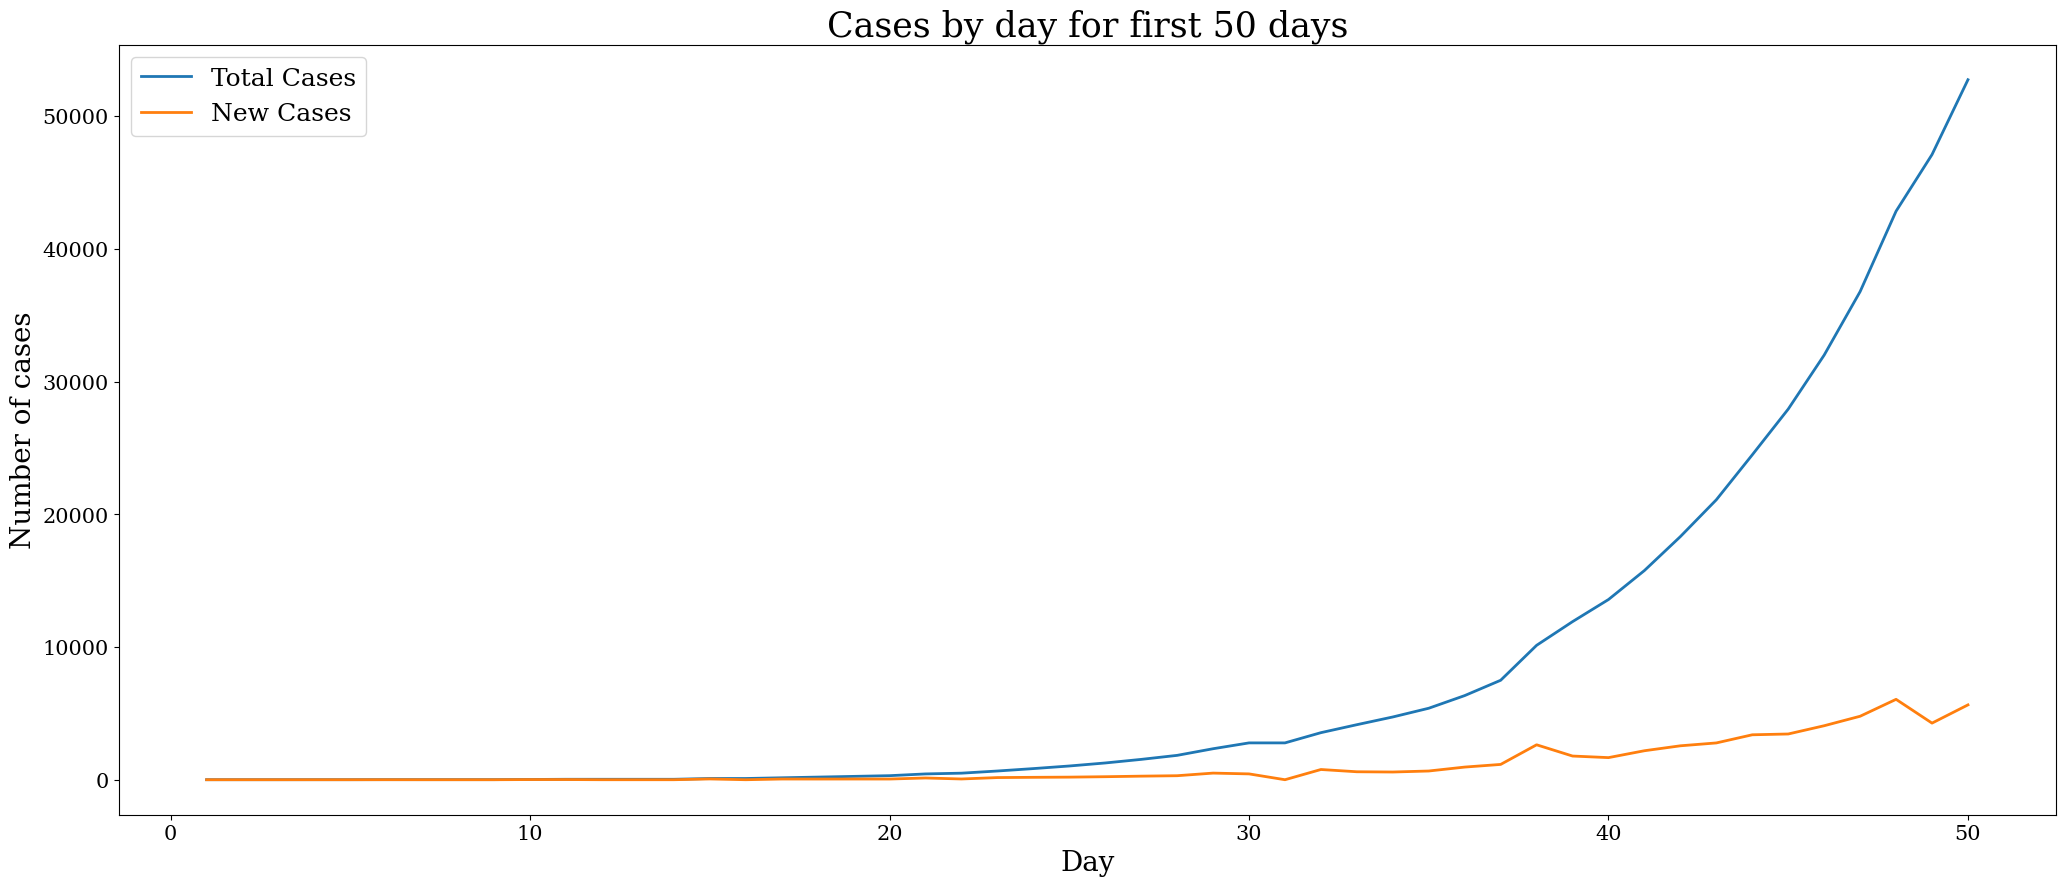

In [9]:
plt.plot(train['current_date'], train['total_cases'], label='Total Cases')
plt.plot(train['current_date'], train['new_cases'], label='New Cases')
plt.legend()
plt.title('Cases by day for first 50 days')
plt.xlabel('Day')
plt.ylabel('Number of cases')

Text(0, 0.5, 'Number of cases')

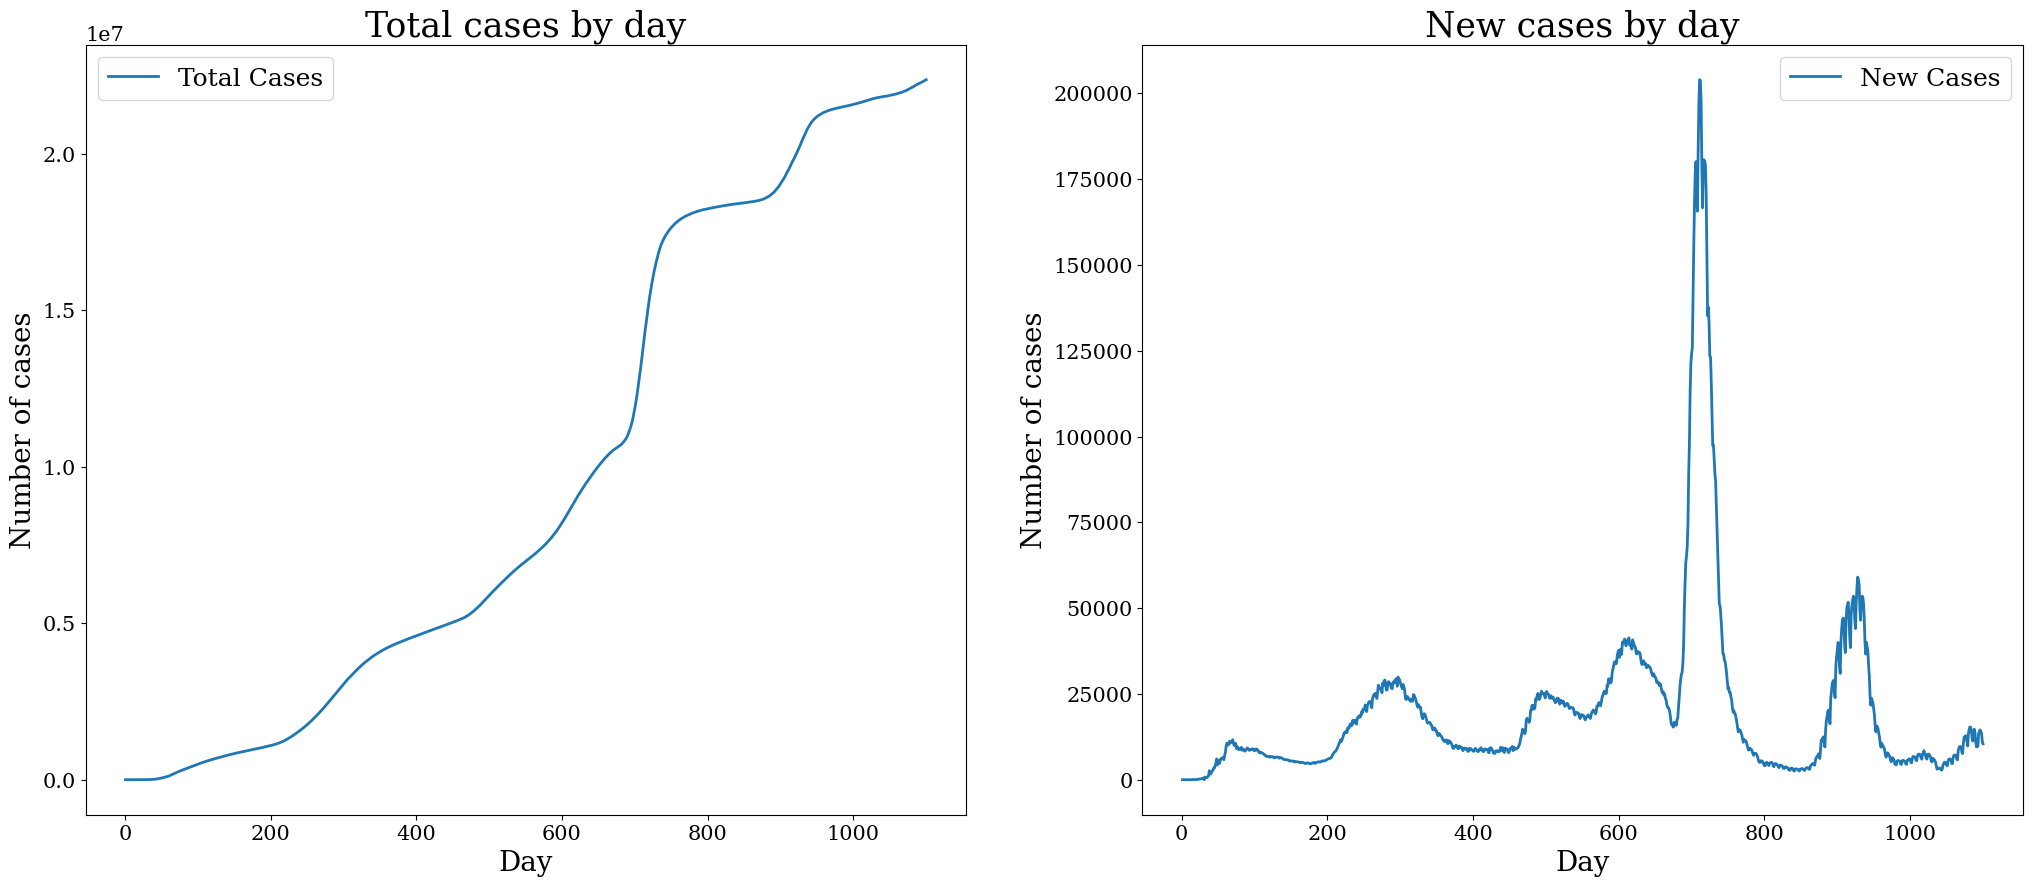

In [10]:
plt.subplot(121)
plt.plot(df_rus['current_date'], df_rus['total_cases'], label='Total Cases')
plt.legend()
plt.title('Total cases by day')
plt.xlabel('Day')
plt.ylabel('Number of cases')

plt.subplot(122)
plt.plot(df_rus['current_date'], df_rus['new_cases'], label='New Cases')
plt.legend()
plt.title('New cases by day')
plt.xlabel('Day')
plt.ylabel('Number of cases')

$$ y = e^{w_0 + wx} -> \ln y = w_0 + wx$$

### total cases

In [11]:
model = LinearRegression()
X, ln_y = train['current_date'].values.reshape(-1, 1), np.log(train['total_cases']).values.reshape(-1, 1)
model.fit(X, ln_y)

LinearRegression()

In [12]:
w = float(model.coef_[0])
w_0 = float(model.intercept_)
w_0, w

(0.9793129090560413, 0.2141063665825282)

In [13]:
preds = np.exp(w_0 + train['current_date'] * w)

In [16]:
np.mean(preds == np.exp(model.predict(train['current_date'].values.reshape(-1, 1)).reshape(-1)))

1.0

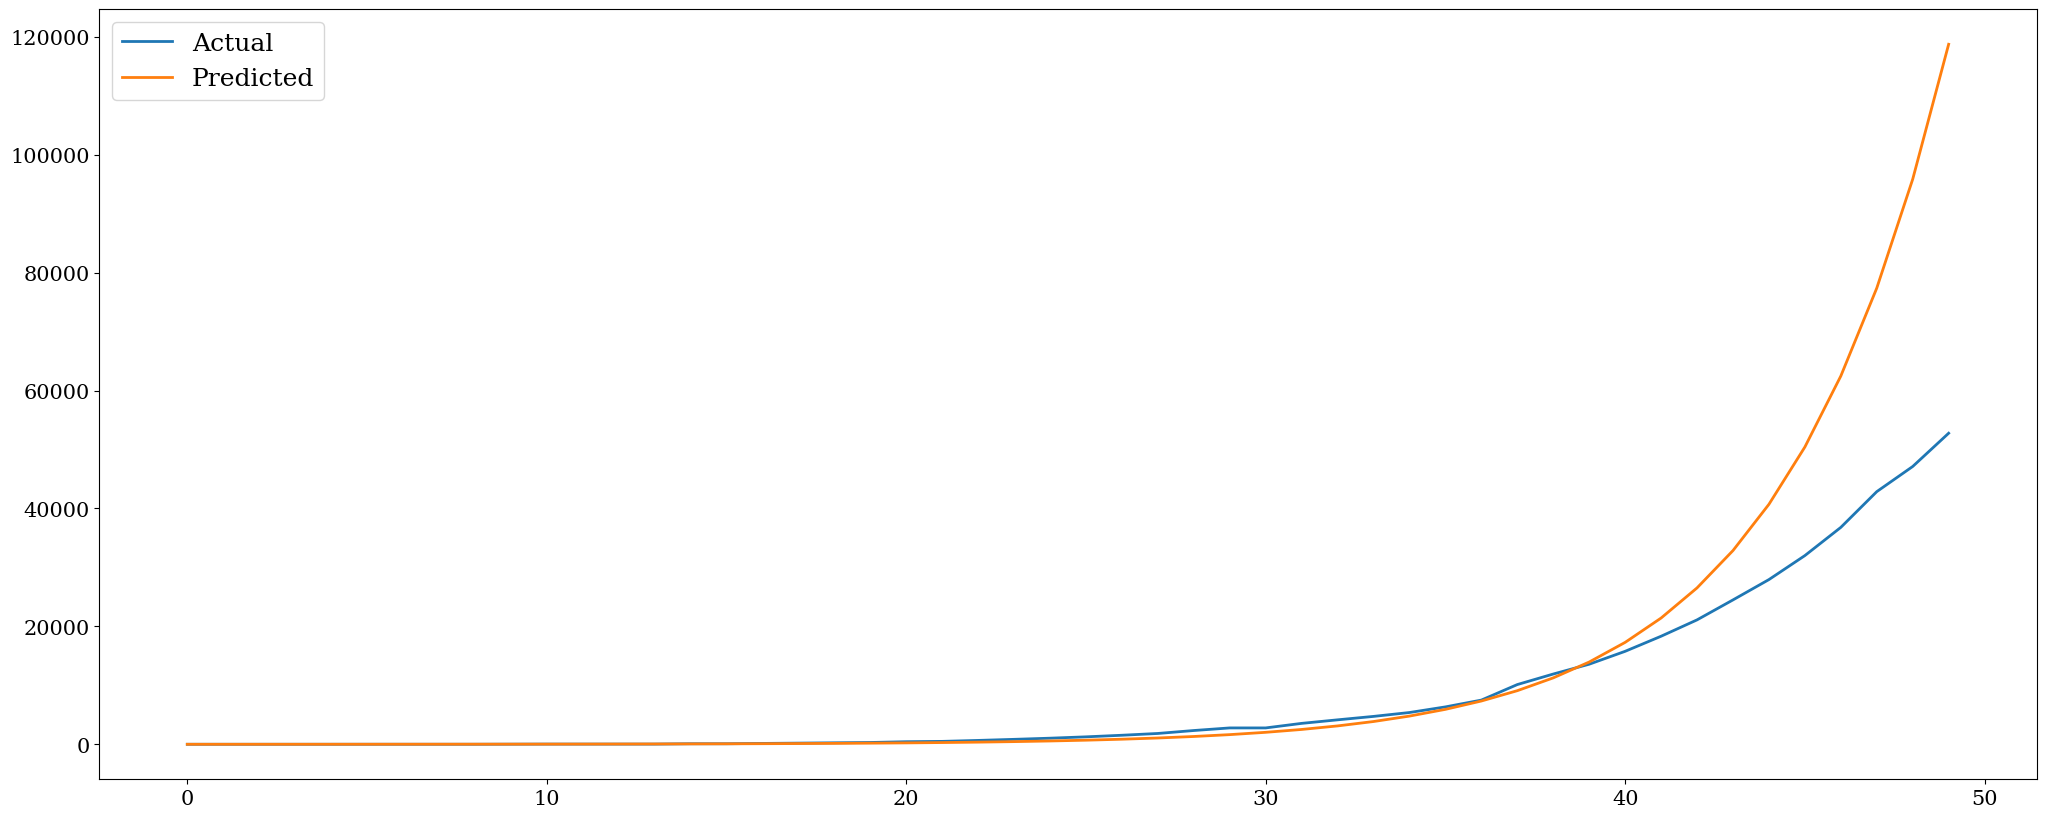

In [17]:
plt.plot(train['total_cases'], label="Actual")
plt.plot(preds, label="Predicted")
plt.legend()

## 2b

In [20]:
var = np.var(model.predict(train['current_date'].values.reshape(-1, 1)) - ln_y.reshape(-1, 1))
sigma_noise = var**0.5
sigma_noise

0.4498899109116322

In [21]:
def bayesian_update(mu, sigma, x, y, sigma_noise=sigma_noise):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y])))
    return mu_n, sigma_n

In [22]:
cur_mu, cur_sigma = np.zeros(2), sigma_noise**2 * np.array([[1, 0], [0, 1]])
cur_mu, cur_sigma

(array([0., 0.]),
 array([[0.20240093, 0.        ],
        [0.        , 0.20240093]]))

In [23]:
for i in range(train.shape[0]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, 
                                        train.iloc[i]['current_date'], 
                                        np.log(train.iloc[i]['total_cases']), 
                                        sigma_noise=sigma_noise)
    
print("Параметры апостериорного распределения весов модели:")
print(f"mu: {cur_mu}")
print(f"sigma: {cur_sigma}")    

Параметры апостериорного распределения весов модели:
mu: [0.90520907 0.21630243]
sigma: [[ 1.54156263e-02 -4.57879223e-04]
 [-4.57879223e-04  1.83151689e-05]]


## 2c

In [26]:
def myplot_sample_lines(mu, sigma, n=20, max_day=50):
    # Посэмплируем и порисуем экспоненты
    my_w = np.random.multivariate_normal(mu, sigma, n)
    sample_distrs = []

    xs = np.arange(max_day)
    X_new = np.column_stack((np.ones(max_day), xs))
    for w in my_w:
        plt.plot(xs, np.exp(X_new @ w.reshape(2, 1)), 'k-', lw=.4)
    plt.ylim((0, 50000))
    plt.xlim((0, 50))

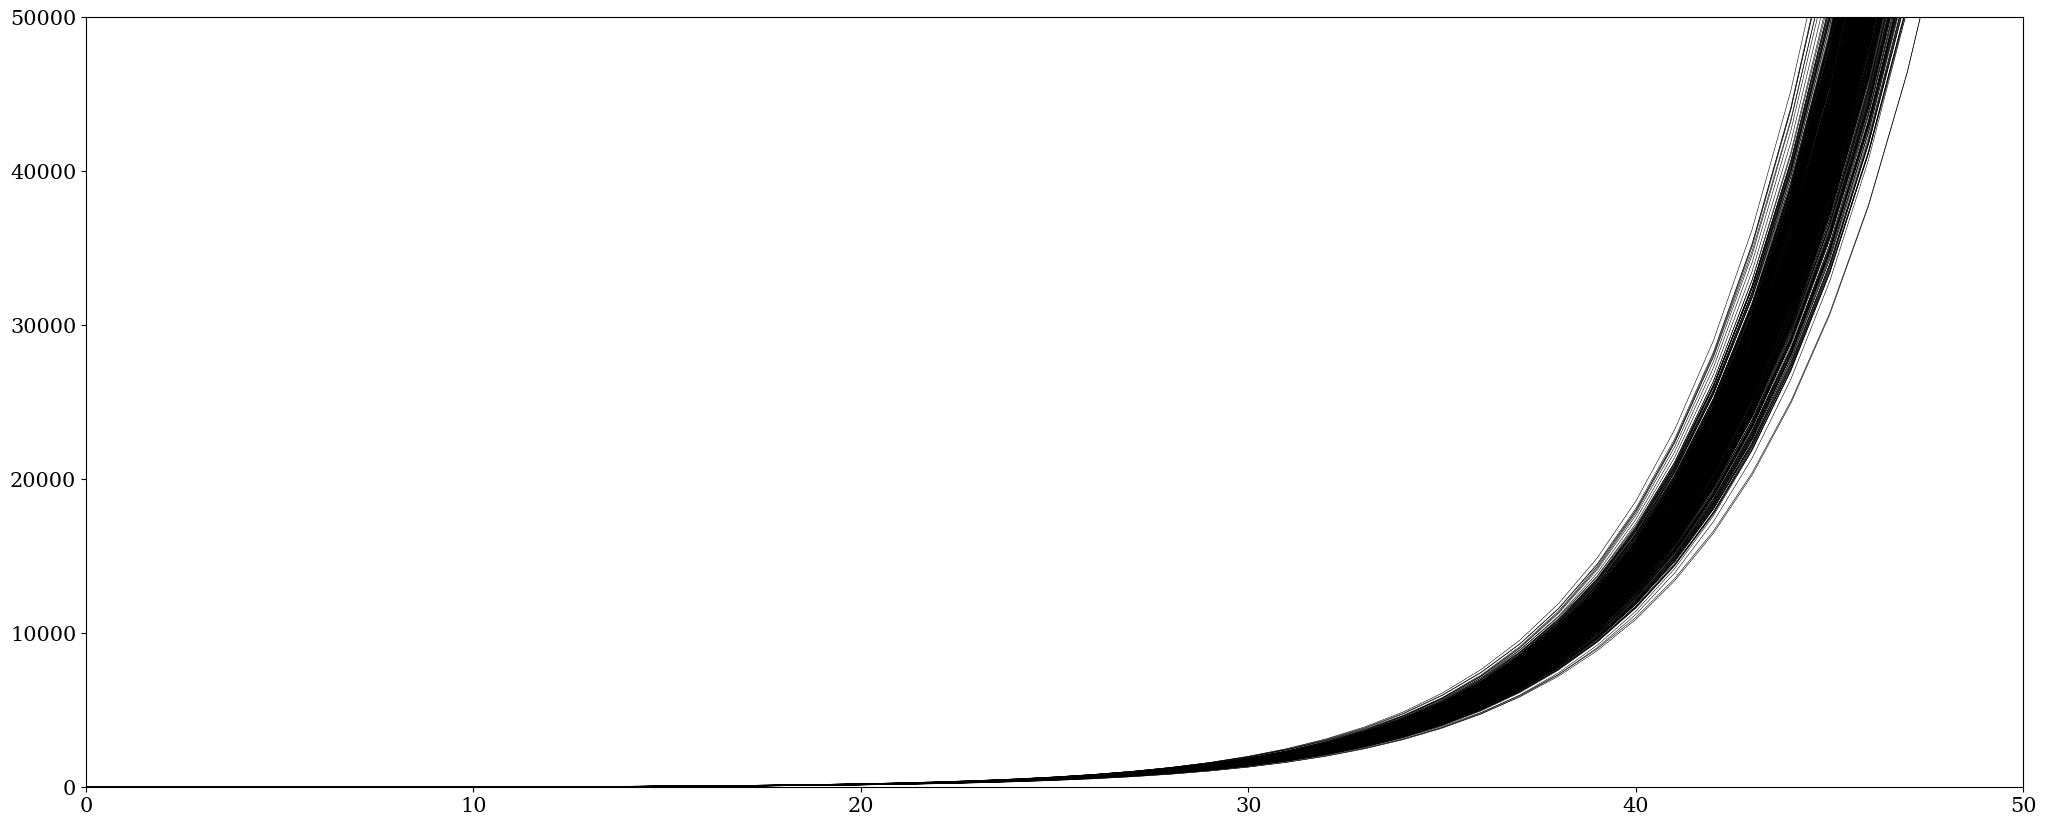

In [27]:
myplot_sample_lines(cur_mu, cur_sigma, 500)

In [28]:
def get_sample_distrs(days, mu, sigma, n=100):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    sample_distrs = {day:[] for day in days}
    for w in my_w:
        for day in days:
            sample_distrs[day].append(np.exp(np.dot(w, np.array([1, day]))))
            
    return sample_distrs

In [29]:
N = 1000
days = [59, 90, 182]
dists = get_sample_distrs(days, cur_mu, cur_sigma, N)

Text(0, 0.5, 'probability density(x)')

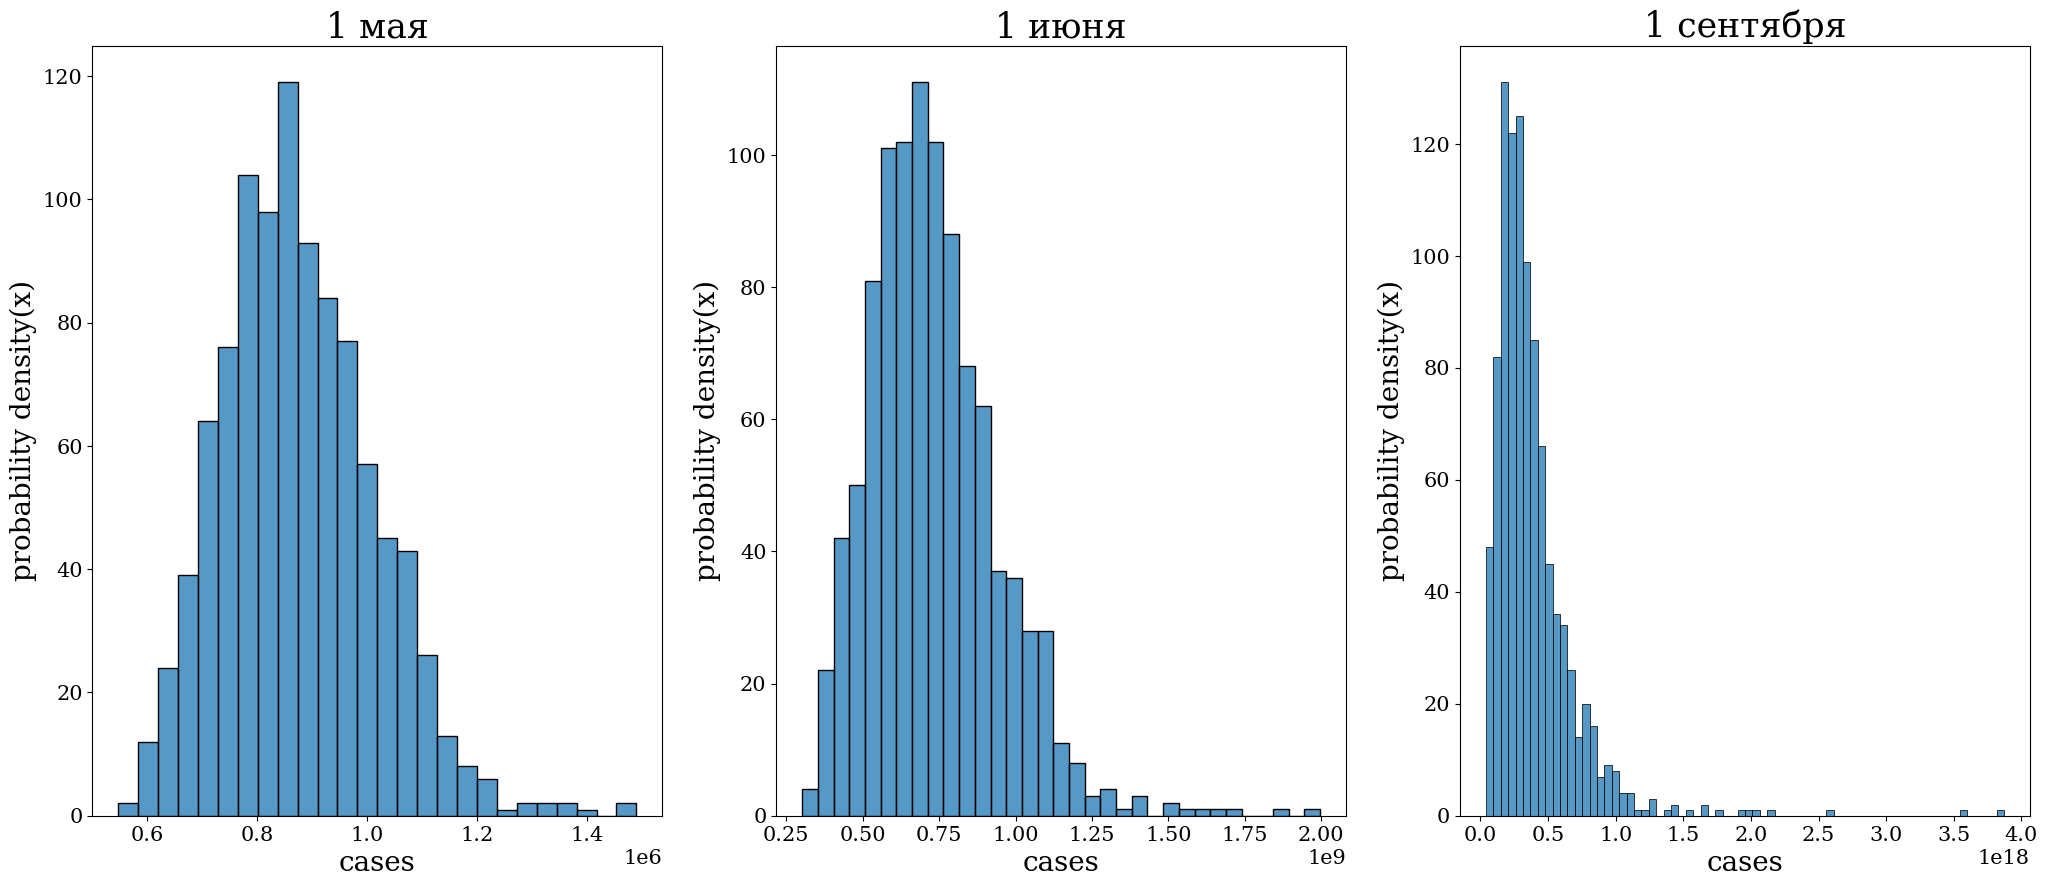

In [33]:
plt.subplot(131)
sns.histplot(dists[59])
plt.xlabel('cases')
plt.title('1 мая')
plt.ylabel('probability density(x)')

plt.subplot(132)
sns.histplot(dists[90])
plt.xlabel('cases')
plt.title('1 июня')
plt.ylabel('probability density(x)')

plt.subplot(133)
sns.histplot(dists[182])
plt.xlabel('cases')
plt.title('1 сентября')
plt.ylabel('probability density(x)')